<h1> <b> Clustering

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, GridSearchCV

<h3> Generate Random Blob Samples

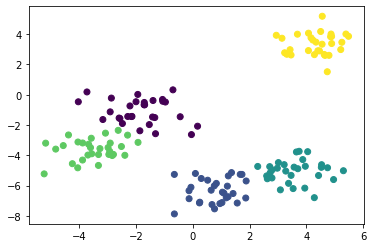

In [306]:
X, y = make_blobs(n_samples = 150, centers = 5, n_features = 2, cluster_std = 0.8, #[1, 1, 1, 1],
                 )

plt.scatter(X[:,0],X[:,1], c = y)

In [307]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

<h2> <b> A. K-Means Clustering

In [308]:
km1 = KMeans(n_clusters = 3)
km1.fit(X)
ypred = km1.predict(X);

report_km1 = classification_report(y, ypred)
# print(report_km1); #classes don't correspond to 
km1.inertia_

C:\Users\manue\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


450.7755914276075

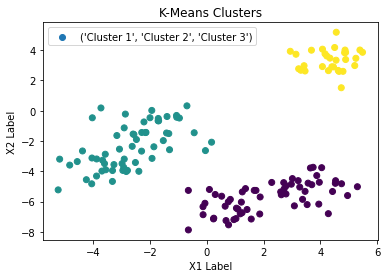

In [309]:
classes = ('Cluster 1', 'Cluster 2', 'Cluster 3')
plt.scatter(X[:,0], X[:,1], c = ypred, label = classes)
plt.title("K-Means Clusters")
plt.xlabel("X1 Label")
plt.ylabel("X2 Label")
plt.legend()

<h4> <b> Finding the best value of k via Elbow Plot of Inertia

In [310]:
k_inertia = np.empty([0, 2])
ks = list(range(1,21))

for k in ks:
    km_00 = KMeans(k, random_state = 42)
    km_00.fit(X)
    inertia_00 = km_00.inertia_
    k_inertia = np.vstack((k_inertia, [k,inertia_00]))

k_inertia

array([[1.00000000e+00, 3.29721334e+03],
       [2.00000000e+00, 1.49139246e+03],
       [3.00000000e+00, 4.50775591e+02],
       [4.00000000e+00, 3.09714455e+02],
       [5.00000000e+00, 1.74727879e+02],
       [6.00000000e+00, 1.55154150e+02],
       [7.00000000e+00, 1.40895391e+02],
       [8.00000000e+00, 1.27009658e+02],
       [9.00000000e+00, 1.14975864e+02],
       [1.00000000e+01, 1.03981816e+02],
       [1.10000000e+01, 9.65469833e+01],
       [1.20000000e+01, 8.67389310e+01],
       [1.30000000e+01, 8.05637372e+01],
       [1.40000000e+01, 7.26989471e+01],
       [1.50000000e+01, 6.72036765e+01],
       [1.60000000e+01, 5.91998344e+01],
       [1.70000000e+01, 5.51933061e+01],
       [1.80000000e+01, 4.99160494e+01],
       [1.90000000e+01, 4.62323132e+01],
       [2.00000000e+01, 4.37460553e+01]])

Text(0.5, 0, 'k-value')

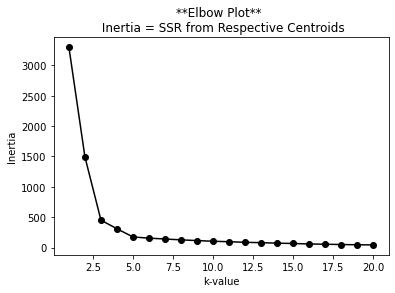

In [311]:
plt.plot(range(1,21), k_inertia[:,1], "-ok", label = "Inertia")
plt.title("**Elbow Plot** \n Inertia = SSR from Respective Centroids")
plt.ylabel("Inertia")
plt.xlabel("k-value")


<h3> <b>Automatically find the elbow (My Own Code)

In [312]:
def find_elbow(k_inertia):
    k_inertia_changes = np.array([1,None]) #exclude the first point because it is largest

    for i in range(1,len(k_inertia)-2):
        iner_decrease_prior = k_inertia[i-1,1] - k_inertia[i,1]
        iner_decrease_post = k_inertia[i,1] - k_inertia[i+1,1]
        percent_decrease = ((iner_decrease_post)/iner_decrease_prior) #
        k_inertia_changes = np.vstack((k_inertia_changes, [k_inertia[i,0], percent_decrease]))

    ind = np.argmin(k_inertia_changes[1:,1])+1 #exclude the first point, which is None
    best_k = int(k_inertia[ind, 0])

    return best_k, ind, k_inertia_changes

def find_elbow_plot(k_inertia):
    best_k_ind = find_elbow(k_inertia)[1]

    plt.plot(list(range(1,len(k_inertia)+1)), k_inertia[:,1], "-ok", label = "Inertia")
    plt.title("**Elbow Plot** \n Inertia = SSR from Respective Centroids")
    plt.ylabel("Inertia")
    plt.xlabel("k-value")

    #elbow 
    plt.plot(k_inertia[best_k_ind,0], k_inertia[best_k_ind,1], "or", ms = 8, label = "Elbow (Automatically Found)")
    plt.legend()

Text(0, 0.5, 'Relative Decrease after vs before')

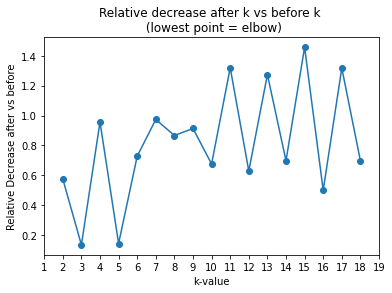

In [313]:
best_k, best_k_ind, k_inertia_changes = find_elbow(k_inertia)

plt.plot(range(1,len(k_inertia)-1),k_inertia_changes[:,1], "-o")
plt.xticks(range(1,len(k_inertia)));
plt.title("Relative decrease after k vs before k \n (lowest point = elbow)")
plt.xlabel("k-value")    
plt.ylabel("Relative Decrease after vs before")

3 2


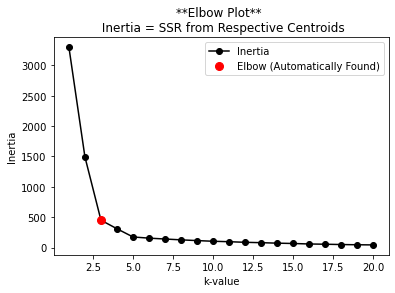

In [314]:
find_elbow_plot(k_inertia)
print(best_k, best_k_ind)